# **Analisis Bike Sharing Dataset**


Nama: Rabiahtul Adawiah Hasyani

**Berdasarkan Bike Sharing Dataset adapun pertanyaan bisnisnya sebagai berikut.**


1.   Bagaimana pola peminjaman sepeda bervariasi setiap jamnya?
2.   Bagaimanakah peminjaman sepeda di tiap harinya?
3.   Apakah ada perbedaan dalam komposisi peminjam sepeda antara hari kerja dan hari libur?
4.   Bagaimana hubungan antara kondisi cuaca (misalnya cerah, berawan, hujan) dan jumlah peminjaman sepeda?
5.  Apakah musim tertentu cenderung memiliki tingkat peminjaman sepeda yang lebih tinggi daripada yang lain?
6. Apakah terdapat peningkatan atau penurunan signifikan dalam jumlah peminjaman sepeda dari satu tahun ke tahun berikutnya?



In [142]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
day_df=pd.read_csv('/content/day.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [144]:
hour_df=pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Wrangling Data**

**Assessing Data**

**Melakukan pengecekan terhadap pada day_df.**



In [145]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [146]:
day_df.shape

(731, 16)

In [147]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [148]:
day_df.duplicated().sum()

0

Pada dataset day tidak memiliki missing value dan tidak terdapat data yang duplikat.

**Melakukan pengecekan terhadap hour_df**

In [149]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [150]:
hour_df.shape

(17379, 17)

In [151]:
hour_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [152]:
hour_df.duplicated().sum()

0

Pada dataset hour tidak memiliki missing value dan tidak terdapat data yang duplikat.

**Cleaning Data**

In [153]:
#mengubah season_labels
season_labels = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

In [154]:
#mengubah weather_labels
weather_labels = {
    1: 'cerah',
    2: 'berawan',
    3: 'hujan ringan',
    4: 'hujan lebat'
}

In [155]:
#mengubah angka pada hari menjadi kategorikal
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [156]:
#menghapus kolom yang tidak digunakan pada kedua dataset
day_df.drop([ 'instant','windspeed'], axis=1, inplace=True)
hour_df.drop([ 'instant','windspeed'], axis=1, inplace=True)

# **EDA**

In [157]:
#melakukan inner join pada kedua dataset
bike_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,casual_day,registered_day,cnt_day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,0,Sat,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,0,Sat,0,2,0.344167,0.363625,0.805833,331,654,985
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,0,Sat,0,2,0.344167,0.363625,0.805833,331,654,985
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,0,Sat,0,2,0.344167,0.363625,0.805833,331,654,985
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,0,Sat,0,2,0.344167,0.363625,0.805833,331,654,985


In [158]:
bike_df.describe()

,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,...,mnth_day,holiday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,casual_day,registered_day,cnt_day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,...,6.537775,0.028770,0.682721,1.391680,0.496987,0.475775,0.627229,854.339720,3679.353242,4533.692963
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,...,3.438776,0.167165,0.465431,0.540501,0.182445,0.162426,0.141779,685.686754,1544.953518,1917.376947
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,...,4.000000,0.000000,0.000000,1.000000,0.340000,0.338363,0.520000,318.000000,2545.000000,3214.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,...,7.000000,0.000000,1.000000,1.000000,0.502500,0.490122,0.625833,724.000000,3681.000000,4563.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,...,10.000000,0.000000,1.000000,2.000000,0.655833,0.610488,0.729583,1100.000000,4801.000000,5986.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,...,12.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,3410.000000,6946.000000,8714.000000


In [159]:
# Membuat kolom baru dengan label cuaca
bike_df['weather_label_day'] = bike_df['weathersit_day'].map(weather_labels)

In [160]:
# Membuat kolom baru dengan label musim
bike_df['season_label_day'] = bike_df['season_day'].map(season_labels)

In [161]:
daily_analysis = bike_df.groupby('weekday_day')['cnt_hour'].mean().reset_index()
print(daily_analysis)

  weekday_day    cnt_hour
0         Fri  196.135907
1         Mon  183.744655
2         Sat  190.209793
3         Sun  177.468825
4         Thu  196.436665
5         Tue  191.238891
6         Wed  191.130505


In [162]:
hourly_analysis = bike_df.groupby('hr')['cnt_hour'].mean().reset_index()
print(hourly_analysis.head())

   hr   cnt_hour
0   0  53.898072
1   1  33.375691
2   2  22.869930
3   3  11.727403
4   4   6.352941


In [163]:
holiday_analysis=bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day", ascending=False)
print(holiday_analysis)

   holiday_day      cnt_day
0            0  4556.906215
1            1  3750.060000


In [164]:
daily_weather_analysis = bike_df.groupby('weather_label_day')['cnt_day'].mean().reset_index().sort_values("cnt_day", ascending=False)
print(daily_weather_analysis)

  weather_label_day      cnt_day
1             cerah  4895.177083
0           berawan  4062.717595
2      hujan ringan  1914.700855


In [165]:
season_analysis = bike_df.groupby('season_label_day')['cnt_day'].mean().reset_index().sort_values("cnt_day", ascending=False)
print(season_analysis)

  season_label_day      cnt_day
0             fall  5654.093194
2           summer  4995.253119
3           winter  4765.366021
1         springer  2635.348185


In [166]:
yearly_analysis = bike_df.groupby('yr_day')['cnt_day'].mean().reset_index()
print(yearly_analysis)

   yr_day      cnt_day
0       0  3431.494274
1       1  5624.660179


# **Visualisasi Data**

<ipython-input-167-19c0edb16409>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='hr', y='cnt_hour', data=hourly_analysis, palette='viridis')


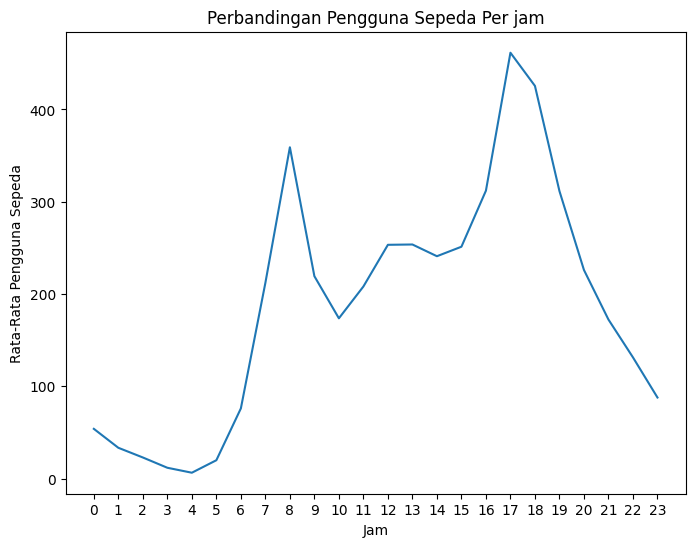

In [167]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='hr', y='cnt_hour', data=hourly_analysis, palette='viridis')
plt.title('Perbandingan Pengguna Sepeda Per jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Pengguna Sepeda')
plt.xticks(range(24), labels=[str(i) for i in range(24)])
plt.show()

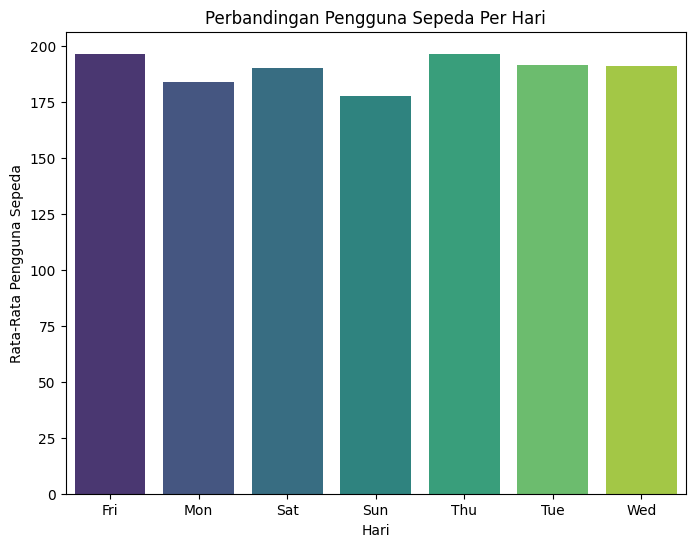

In [168]:
#Membuat Bar Plot Untuk Melihat Perbandingan Pengguna Sepeda Per Hari
plt.figure(figsize=(8, 6))
sns.barplot(x='weekday_day', y='cnt_hour', data=daily_analysis, hue='weekday_day', palette='viridis')
plt.title('Perbandingan Pengguna Sepeda Per Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-Rata Pengguna Sepeda')
plt.show()

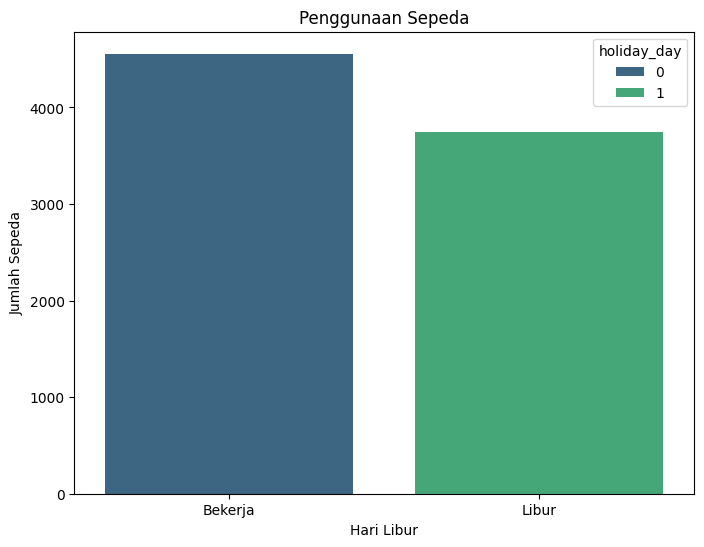

In [169]:
#Membuat bar plot untuk melihat pengguna sepeda
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday_day', y='cnt_day', data=holiday_analysis, hue='holiday_day', palette='viridis')
plt.title('Penggunaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Sepeda')
plt.xticks([0, 1], ['Bekerja', 'Libur'])
plt.show()

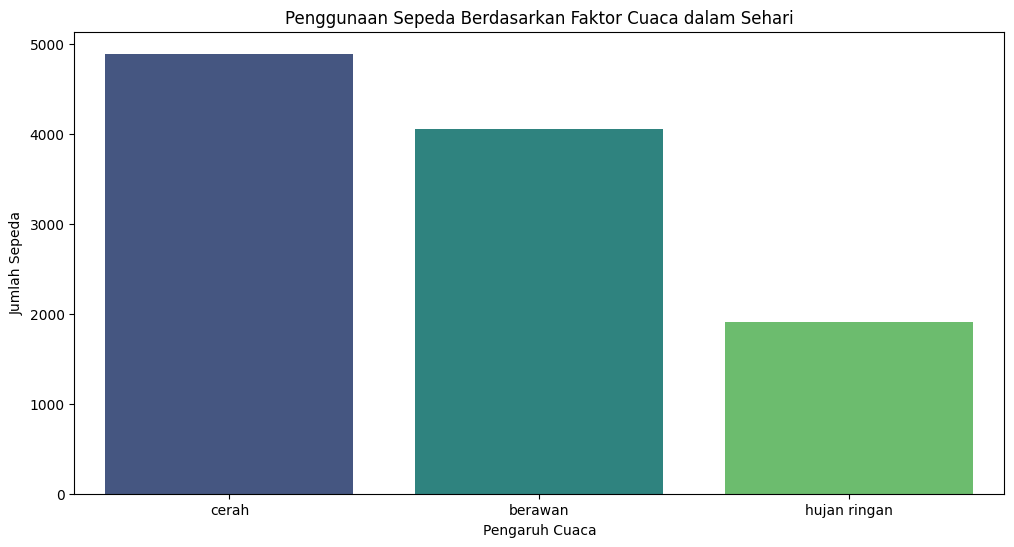

In [170]:
# Membuat bar plot pengaruh cuaca terhadap pengguna sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_label_day', y='cnt_day', data=daily_weather_analysis, hue='weather_label_day', palette='viridis')
plt.title('Penggunaan Sepeda Berdasarkan Faktor Cuaca dalam Sehari')
plt.xlabel('Pengaruh Cuaca')
plt.ylabel('Jumlah Sepeda')
plt.show()

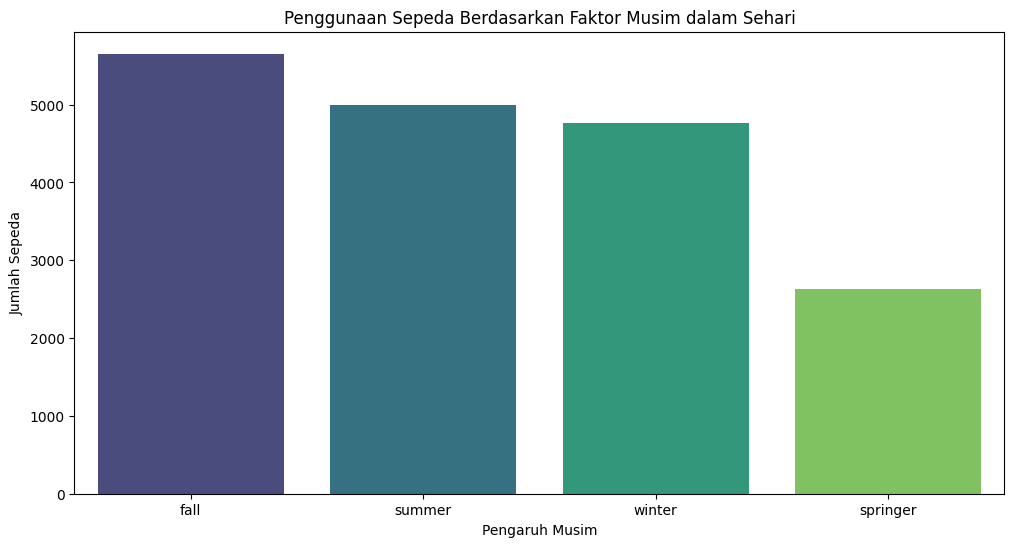

In [171]:
# Membuat bar plot pengaruh musim terhadap pengguna sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x='season_label_day', y='cnt_day', data=season_analysis, hue='season_label_day', palette='viridis')
plt.title('Penggunaan Sepeda Berdasarkan Faktor Musim dalam Sehari')
plt.xlabel('Pengaruh Musim')
plt.ylabel('Jumlah Sepeda')
plt.show()

Pengguna sepeda terbanyak pada cuaca yang cerah, maka cuaca juga menjadi faktor pada pengguna sepeda

<ipython-input-172-540410cb369f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yr_day', y='cnt_day', data=yearly_analysis, palette='muted')


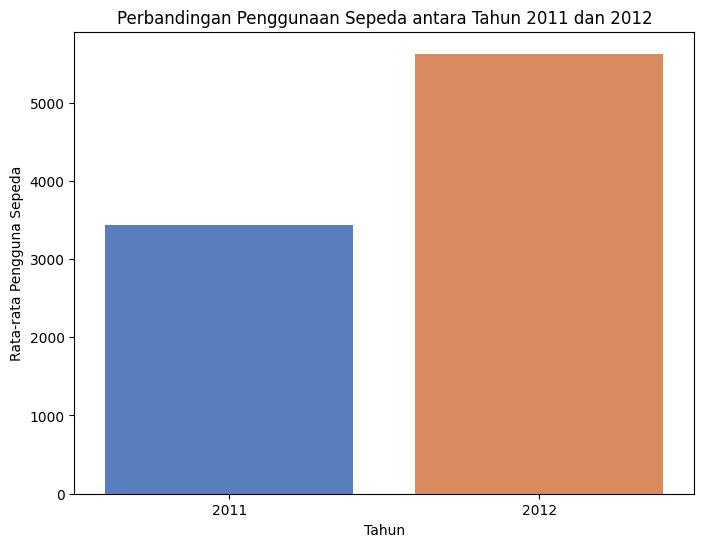

In [172]:
#Membuat Bar Plot untuk melihat perbandingan pengguna sepeda di tahun 2011 dan 2012
plt.figure(figsize=(8, 6))
sns.barplot(x='yr_day', y='cnt_day', data=yearly_analysis, palette='muted')
plt.title('Perbandingan Penggunaan Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Pengguna Sepeda')
plt.xticks([0, 1], ['2011', '2012'])
plt.show()

# **Conclusion**






**Maka dapat ditarik Kesimpulannya sebagai berikut.**


1. Penggunaan sepeda terbanyak pada jam 17:00 atau pada pukul 5 sore hari. Ini mungkin karena pada jam 17:00, orang-orang lebih banyak menggunakan sepeda untuk transportasi.

2. Penggunaan sepeda terbanyak pada hari Senin. Ini mungkin karena pada hari Kamis atau Thursday, orang-orang lebih banyak menggunakan sepeda untuk transportasi. Jika dilihat tidak terlihat perbedaan yang signifikan diantara hari Jum'at dan Kamis. Jika dilihat dari jumlahnya bahwa pengguna sepeda di hari kamis berjumlah 196.436665 sedangkan pada Hari Jum'at yaitu sebesar 196.135907. Untuk Penggunaan sepeda terendah jika dilihat dari hari yaitu pada hari Minggu yaitu sebesar 177.468825.

3. Penggunaan sepeda terbanyak pada hari Bekerja. Dapat dilihat perbedaan yang cukup signifikan antara pengguna sepeda di hari libur dan di hari bekerja.

4. Jika dilihat dari grafik maka diketahui bahwa pada cuaca yang cerah banyak pengguna menggunakan sepeda berbeda dengan pada cuaca hujan ringan yang memiliki nilai yang rendah diantara lainnya.

5. Pada Musim Gugur atau fall lah yang meningkat dalam penggunaan sepeda. Musim semi atau springer merupakan musim yang memiliki penurunan jumlah penggunaan sepeda berbeda hal nya dengan musim panas yang menempati posisi kedua dan posisi ketiga yaitu pada musim winter.

6. Data yang dianalisi adalah data di tahun 2011 hingga tahun 2012. Maka dapat diketahui pada tahun 2012 memiliki peningkatan pengguna sepeda dapat dikatakan bahwa peningkatan tersebut signifikan.